In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
%matplotlib inline

In [2]:
import torch
from torchvision import datasets, transforms, models
data_root = "./data/"

In [3]:
def load_data(dataset):
    data_path = data_root
    ann_path = data_root
    
    if 'coco' in dataset:
        train_path = data_root+'coco/train2017'
        train_ann_path = data_root+'coco/annotations/instances_train2017.json'
        data_train = datasets.CocoDetection(root = train_path, annFile = train_ann_path)
        
        test_path = data_root+'coco/val2017'
        test_ann_path = data_root+'coco/annotations/instances_val2017.json'
        data_test = data_train = datasets.CocoDetection(root = test_path, annFile = test_ann_path)
    elif 'voc' in dataset:
        year = dataset[3:]
        assert year in ['2007', '2012'] , 'Only support voc2007 and voc2012'
        
        data_train = datasets.VOCDetection(root = data_root, year=year, image_set='train')
        data_test = datasets.VOCDetection(root = data_root, year=year, image_set='val')
    else:
        assert False, "Dataset is not recognize. It is neiter coco, voc2007, nor voc2012"
    
    return data_train, data_test

In [4]:
def preview_data(dataset):
    n = np.random.randint(len(dataset))
    image, label = dataset[n]
    ds = 'coco' if 'annotation' not in label else 'voc'
        
    # Get bounding boxes and their categories
    if ds == 'coco':
        with open(data_root+'coco/annotations/coco-labels-paper.txt', 'r') as f:
            coco_labels = f.read().splitlines()
        bboxes = np.zeros((len(label), 4))
        cats = np.zeros((len(label), 1), dtype='U10')
        
        for i, item in enumerate(label):
            bboxes[i] = label[i]['bbox']
        for i, item in enumerate(label):
            cats[i] = coco_labels[int(label[i]['category_id'])-1]
        
    else:
        bboxes = np.zeros((len(label['annotation']['object']), 4))
        cats = np.empty((len(label['annotation']['object']), 1), dtype='U10')
        
        if type(label['annotation']['object']) is list:
            for i, el in enumerate(label['annotation']['object']):
                cats[i] = el['name']
                bboxes[i] = list(el['bndbox'].values())
        else:
            cats[0] = label['annotation']['object']['name']
            bboxes[0] = list(label['annotation']['object']['bndbox'].values())
            
    # Get bounding box colors
    num_class = len(cats)
    colors = np.random.rand(num_class)
    cmap = plt.get_cmap('tab20')
    bbox_colors = [cmap(i) for i in colors]
    color = {}
    
    img = np.array(image)
    plt.figure()
    fig, ax = plt.subplots(1, figsize=(12,9))
    ax.imshow(img)

    for bbox, cat in zip(bboxes, cats):
        for el in bbox_colors: 
            if color.get(cat.item()) == None:
                color[cat.item()] = bbox_colors[0]
                bbox_colors.remove(bbox_colors[0])
        c = color.get(cat.item())
        
        x0 = bbox[0]
        y0 = bbox[1]
        x1 = bbox[2] if ds == 'coco' else bbox[2]-bbox[0]
        y1 = bbox[3] if ds == 'coco' else bbox[3]-bbox[1]

        box = patches.Rectangle((x0, y0), x1, y1, linewidth=4, edgecolor=c, facecolor='none')
        ax.add_patch(box)
        plt.text(x0, y0, s=cat.item(), 
                 color='black', verticalalignment='top', bbox={'color': c, 'pad': 0})

    plt.axis('off')
    plt.show()

## Preview data

<Figure size 432x288 with 0 Axes>

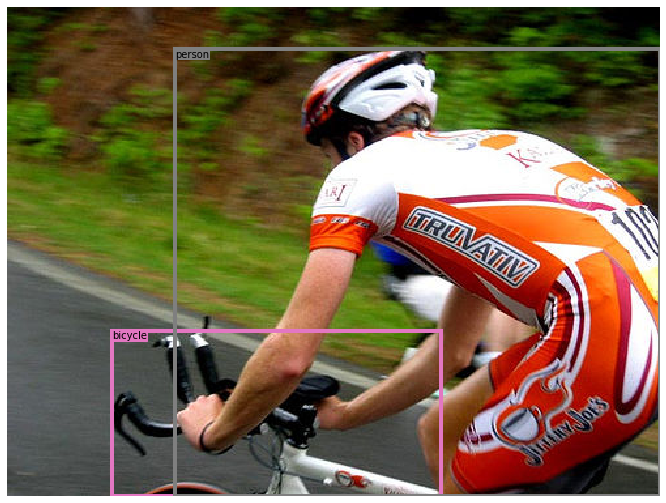

<Figure size 432x288 with 0 Axes>

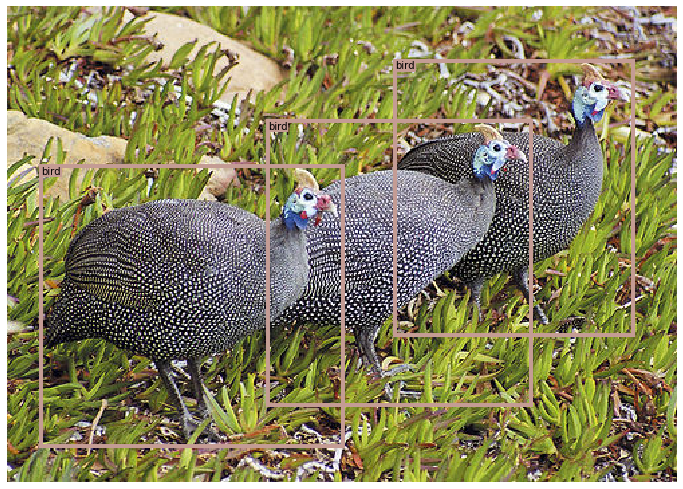

In [5]:
voc2012_train, voc2012_test = load_data(dataset='voc2012')
preview_data(voc2012_train)
preview_data(voc2012_test)

In [ ]:
coco_train, coco_test = load_data(dataset='coco')
voc2007_train, voc2007_test = load_data(dataset='voc2007')
voc2012_train, voc2012_test = load_data(dataset='voc2012')

In [ ]:
print('coco')
preview_data(coco_train)
print('voc2007')
preview_data(voc2007_train)
print('voc2012')
preview_data(voc2012_train)

In [ ]:
#device = torch.device('cpu')
#device = torch.device('cuda')